## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/data/Mouse_metadata.csv"
study_results_path = "Resources/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [41]:
#check length of datasets and unique IDs

mouse_data = len(mouse_metadata_df["Mouse ID"])
mouse_data_IDs = len(mouse_metadata_df["Mouse ID"].unique())
print(mouse_data)
print(mouse_data_IDs)

study_data = len(study_results_df["Mouse ID"])
study_data_IDs = len(study_results_df["Mouse ID"].unique())
print(study_data)
print(study_data_IDs)

249
249
1893
249


In [42]:
# Combine the data into a single dataset
all_data_df = pd.merge(mouse_metadata_df,study_results_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
all_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Check the number of mice.
num_mice = len(all_data_df["Mouse ID"].unique())
print(num_mice)

249


In [44]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
all_data_dups_df = all_data_df[all_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
all_data_dups_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Drop any duplicate rows
all_data_red_df = all_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [46]:
# Recheck the number of mice
print(len(all_data_red_df))

1888


## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

regimen_gb = all_data_red_df.groupby(["Drug Regimen"])

In [48]:
#testing var and std functions on a subset 

# k403_df = all_data_red_df.loc[all_data_red_df["Mouse ID"] == "k403"]
# k403_df

In [49]:
#tested on sample set, to confirm variance and st dev values. These did not match excel
# k403_tumor_mean = k403_df["Tumor Volume (mm3)"].mean()
# k403_tumor_median = k403_df["Tumor Volume (mm3)"].median()
# k403_tumor_var = k403_df["Tumor Volume (mm3)"].var()
# k403_tumor_std = k403_df["Tumor Volume (mm3)"].std()

# print(k403_tumor_mean)
# print(k403_tumor_median)
# print(k403_tumor_var)
# print(k403_tumor_std)

In [50]:
#tested on sample set, to confirm variance and st dev values. Need to use Delta Degrees of Freedom (ddof)=0
# k403_tumor_mean = k403_df["Tumor Volume (mm3)"].mean()
# k403_tumor_median = k403_df["Tumor Volume (mm3)"].median()
# k403_tumor_var = k403_df["Tumor Volume (mm3)"].var(ddof=0)
# k403_tumor_std = k403_df["Tumor Volume (mm3)"].std(ddof=0)

# print(k403_tumor_mean)
# print(k403_tumor_median)
# print(k403_tumor_var)
# print(k403_tumor_std)

In [57]:
tumor_mean = regimen_gb["Tumor Volume (mm3)"].mean()
tumor_median = regimen_gb["Tumor Volume (mm3)"].median()
tumor_var = regimen_gb["Tumor Volume (mm3)"].var(ddof=0)
tumor_std = regimen_gb["Tumor Volume (mm3)"].std(ddof=0)
tumor_sem = regimen_gb["Tumor Volume (mm3)"].sem(ddof=0)

# print(tumor_mean)
# print(tumor_median)
# print(tumor_var)
# print(tumor_std)
# print(tumor_sem)

In [58]:
#create df with new series from groupby: mean, median, variance, # standard deviation, and SEM
tumor_stats_df = pd.DataFrame({"Average Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, 
                             "Tumor Volume Variance": tumor_var, "Tumor Volume St. Dev": tumor_std, 
                             "Tumor Volume SEM": tumor_sem})

tumor_stats_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.393463,50.909965,42.862273,6.546928,0.524174
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


## Bar and Pie Charts

In [118]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_list = all_data_red_df["Drug Regimen"].unique()
drug_tally = regimen_gb["Tumor Volume (mm3)"].count()

#x_axis = np.arange(len(drug_list))
#print(x_axis)
print(drug_list)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


Text(0, 0.5, 'Number of Datapoints')

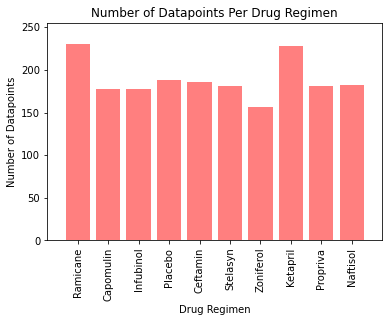

In [144]:
x_axis = np.arange(len(drug_list))
plt.bar(x_axis, drug_tally, color='r', alpha = 0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, (drug_list), rotation="vertical")
plt.xlim(-1, len(x_axis)+0)
plt.ylim(0,max(drug_tally)+25)
plt.title("Number of Datapoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")

In [ ]:
# Generate identical bar plot using pyplot instead of pandas.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#use df.loc female and count(), then df.loc male then count() - or len list 



In [ ]:
# Generate identical pie plot using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
#create df using df.loc with capomulin; print it, pick a mouse, then groupby that mouse

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights